### 生物医学统计概论 -  第三单元  - @林关宁

### 用 Python 讲解 置信区间
The confidence interval is an estimator we use to estimate the value of population parameters. The interval will create a range that might contain the values. When we create the interval, we use a sample mean.  
置信区间是我们用来估计总体参数值的估计量。区间将创建一个可能包含这些值的范围。当我们创建区间时，我们使用样本平均值。

Recall the central limit theorem (CLT), if we sample many times, the sample mean will be normally distributed.

回想一下中心极限定理（CLT），如果我们多次采样，样本均值将是正态分布的。

I create the sample mean distribution to demonstrate this estimator.
（备注：由于电脑的不同，run每个cell后，可能需要几秒钟才会出现图，请耐心等下）

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

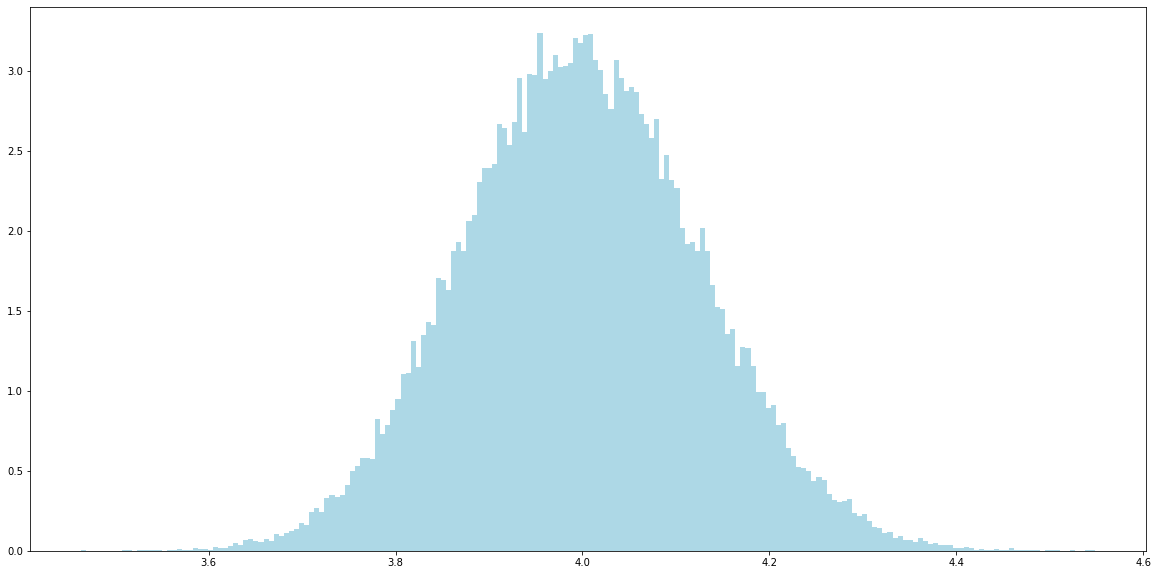

In [7]:
# use gamma distribution
shape, scale = 2.0, 2.0                       # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)
mu = shape*scale                              # mean and standard deviation
sigma = scale*np.sqrt(shape)

# create sample mean distribution
meansample = []
# sample size
samplesize = 500
for j in range(0,50000):
    # sampling 500 sample from population  从人群中抽取500个样本
    rc = random.choices(s, k=samplesize)
    # collect mean of each sample  收集每个样本的平均值
    meansample.append(sum(rc)/len(rc))

plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.show()

样本均值分布为正态分布，均值等于总体均值4。





我们可以将这个分布改为标准正态分布，并使用Z表来计算概率。

在这里，我使用Z表创建了一个覆盖样本平均值95%的范围，如下图所示。

C:\Users\zzh19\AppData\Local\Temp/ipykernel_11796/1826602845.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
C:\Users\zzh19\AppData\Local\Temp/ipykernel_11796/1826602845.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='blue')
C:\Users\zzh19\AppData\Local\Temp/ipykernel_11796/1826602845.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='blue')


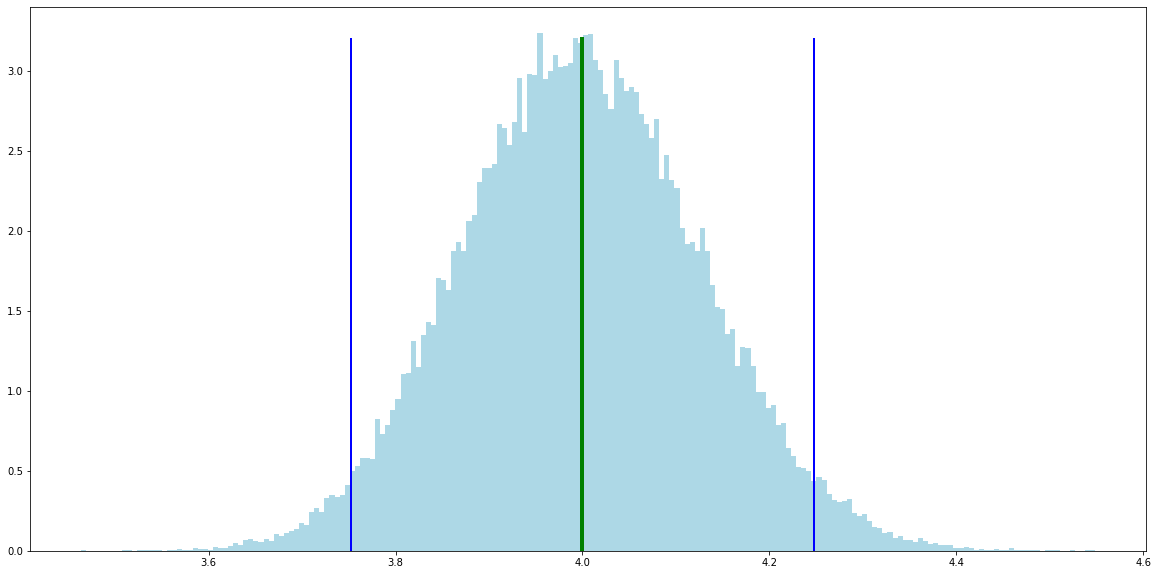

In [8]:
# set mean and 95% probability， 把95%的置信区间标出来
plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='blue')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='blue')
plt.show()

如果我们从人群中取样并计算平均值，95%的时间里，我们将得到两条蓝线以内的平均值。

由于我们无法采样50000次来构建总体的分布。假设我们只能进行一次抽样，得到一个平均值为3.85的样本。我们得到的是红线。

C:\Users\zzh19\AppData\Local\Temp/ipykernel_11796/188726421.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
C:\Users\zzh19\AppData\Local\Temp/ipykernel_11796/188726421.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='blue')
C:\Users\zzh19\AppData\Local\Temp/ipykernel_11796/188726421.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='blue')
C:\Users\zzh19\AppData\Local\Temp

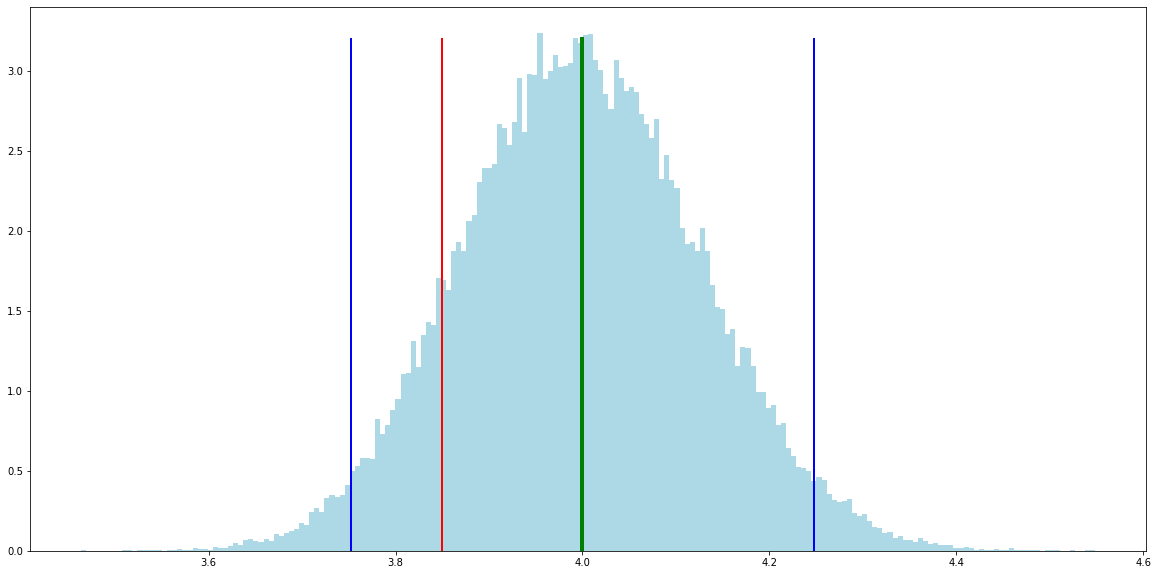

In [9]:
# suppose that we sample 500 data that has a mean as 3.85

# Xbar mean = 3.85, sigma = sigma/np.sqrt(samplesize)
m, ss = 3.85, sigma/np.sqrt(samplesize) # mean and standard deviation
plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='blue')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='blue')
plt.plot([m,m],[0, 3.2], 'k-', lw=2, color='red')
plt.show()

根据我们得到的平均值，我们想要创建一个估计量（estimator）来估计真实均值的值，这里我们使用95%的范围（黄色区域）来创建这一个区间。

我们可以看到这个浅黄色区间覆盖了真正的平均值（绿线）。因为样本平均值与总体平均值（绿线）的偏差在95%范围内，区间（黄色区域）覆盖了真实平均值。

由于样本均值是随机的，因此均值在95%范围之外的概率为5%。这就是当样本均值超出95%范围时发生的情况。

C:\Users\zzh19\AppData\Local\Temp/ipykernel_11796/2523203701.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
C:\Users\zzh19\AppData\Local\Temp/ipykernel_11796/2523203701.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='blue')
C:\Users\zzh19\AppData\Local\Temp/ipykernel_11796/2523203701.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='blue')
C:\Users\zzh19\AppData\Local\T

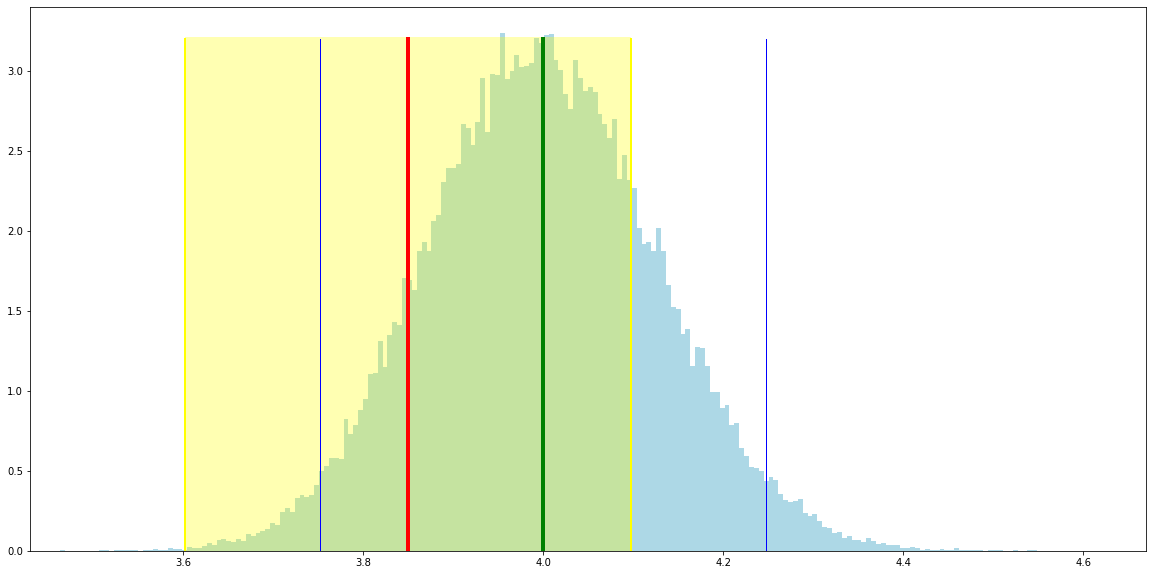

In [10]:
# create an interval around sample mean that we got
plt.figure(figsize=(20,10))

plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='blue')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='blue')
plt.plot([m,m],[0, 3.2], 'k-', lw=4, color='red')
plt.plot([m-(1.96*ss),m-(1.96*ss)],[0, 3.2], 'k-', lw=2, color='yellow')
plt.plot([m+(1.96*ss),m+(1.96*ss)],[0, 3.2], 'k-', lw=2, color='yellow')
# Create a Rectangle patch
plt.gca().add_patch(plt.Rectangle((m-(1.96*ss), 0),2*(1.96*ss),3.21, fill=True, linewidth=3, fc=(1,1,0,0.3)))
plt.xlim(3.43, 4.67) 
plt.show()

如果我们采样得到的平均值不在蓝线范围内，那么区间就不能覆盖真正的平均值。黄色区域就不包括总体人口的平均数。

我们使用95%的置信区间，因为它与样本均值的概率相匹配。如果样本均值在概率边界上，则范围仍覆盖该真实均值，但如果再远一点，则不会覆盖。样本平均值落在两条蓝线内的概率为95%，因此两条线外5%的间隔不会覆盖真实平均值。

E:\GZRJ\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  """
E:\GZRJ\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  
E:\GZRJ\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  import sys
E:\GZRJ\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  
E:\GZRJ\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: color is redundantly defined by th

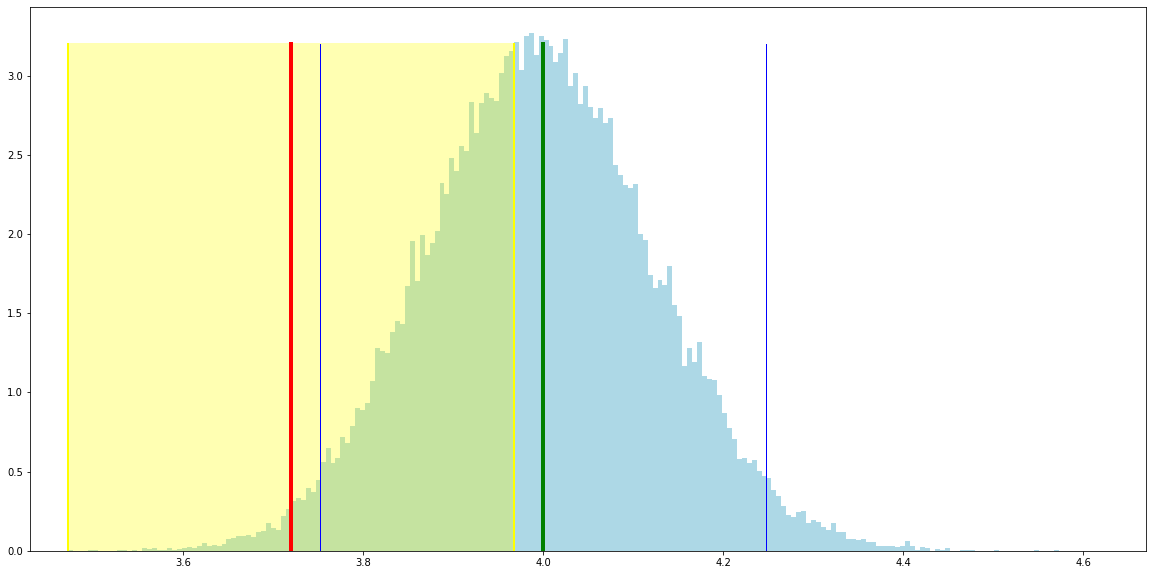

In [6]:
# if the interval is not within 95% range from population mean the interval will not cover the true population mean
plt.figure(figsize=(20,10))
m = 3.72
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='blue')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='blue')
plt.plot([m,m],[0, 3.2], 'k-', lw=4, color='red')
plt.plot([m-(1.96*ss),m-(1.96*ss)],[0, 3.2], 'k-', lw=2, color='yellow')
plt.plot([m+(1.96*ss),m+(1.96*ss)],[0, 3.2], 'k-', lw=2, color='yellow')
# Create a Rectangle patch
plt.gca().add_patch(plt.Rectangle((m-(1.96*ss), 0),2*(1.96*ss),3.21, fill=True, linewidth=3, fc=(1,1,0,0.3)))
plt.xlim(3.43, 4.67) 
plt.show()

95%是一个任意数，你可以设置为任意数。例如，我们可以将置信区间设置为90%的范围。

E:\GZRJ\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  """
E:\GZRJ\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  
E:\GZRJ\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  import sys
E:\GZRJ\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  
E:\GZRJ\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: color is redundantly defined by th

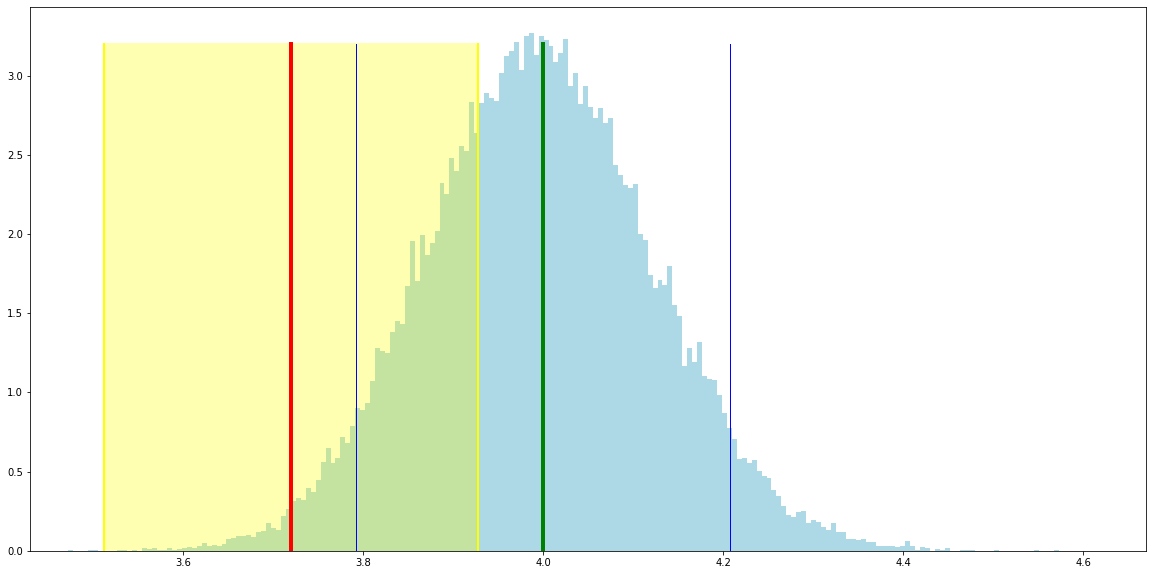

In [7]:
# use 90% instead of 95%
plt.figure(figsize=(20,10))
m = 3.72
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.645*sigma/np.sqrt(samplesize)),mu-(1.645*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='blue')
plt.plot([mu+(1.645*sigma/np.sqrt(samplesize)),mu+(1.645*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='blue')
plt.plot([m,m],[0, 3.2], 'k-', lw=4, color='red')
plt.plot([m-(1.645*ss),m-(1.645*ss)],[0, 3.2], 'k-', lw=2, color='yellow')
plt.plot([m+(1.645*ss),m+(1.645*ss)],[0, 3.2], 'k-', lw=2, color='yellow')
# Create a Rectangle patch
plt.gca().add_patch(plt.Rectangle((m-(1.645*ss), 0),2*(1.645*ss),3.21, fill=True, linewidth=3, fc=(1,1,0,0.3)))
plt.xlim(3.43, 4.67) 
plt.show()

因此，当我们说95%置信度时，意味着我们有95%的信心，样本的平均值将在总体平均值的95%范围内（在两条蓝线内）。

注意：这里唯一随机变量的是样本均值，所以我们不能说总体均值的概率在区间内，因为总体均值不是随机变量，总体均值是一个数字。

理论上，如果我们采样100次，其中95次的样本平均值区间覆盖了总体的平均值。这里我们用python来模拟100次的采样，结果如下。

这个数字可能不是精确的95，因为它毕竟是一个概率。

number of interval that cover the expected values: 98


E:\GZRJ\Anaconda\lib\site-packages\ipykernel_launcher.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.


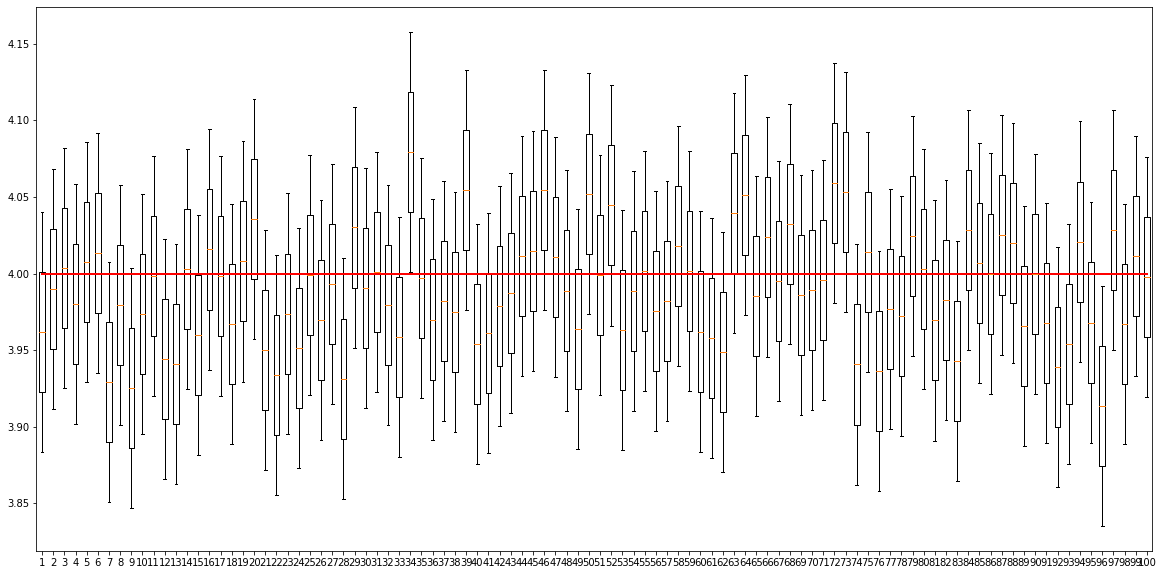

In [8]:
# simulate 100 interval with 5,000 sample size
mu = shape*scale # mean and standard deviation
sigma = scale*np.sqrt(shape)
intervallist = []
k = 1.96
# sample size
samplesize = 5000
# start count
c = 0
for i in range(0,100):
    # sample 100 sample
    rs = random.choices(s, k=samplesize)
    # calculate mean
    mean = np.mean(rs)
    upbound = mean + k*sigma/np.sqrt(samplesize)
    lowbound = mean - k*sigma/np.sqrt(samplesize)
    # collect difference between sample mean and mu
    intervallist.append([lowbound,mean,upbound])
    if upbound >= mu and lowbound <= mu:
        c += 1
        
print("number of interval that cover the expected values:", c)
# set figure size.
plt.figure(figsize=(20,10))
# plot box plots of each sample mean.
plt.boxplot(intervallist)
plt.plot([1, 100],[mu,mu], 'k-', lw=2, color='red')
# show plot.
plt.show()

最后，样本量对这个练习有巨大的影响。如果样本量增加，样本均值的方差将减小，间隔范围也会随之减小。

number of interval that cover the expected values: 97


E:\GZRJ\Anaconda\lib\site-packages\ipykernel_launcher.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.


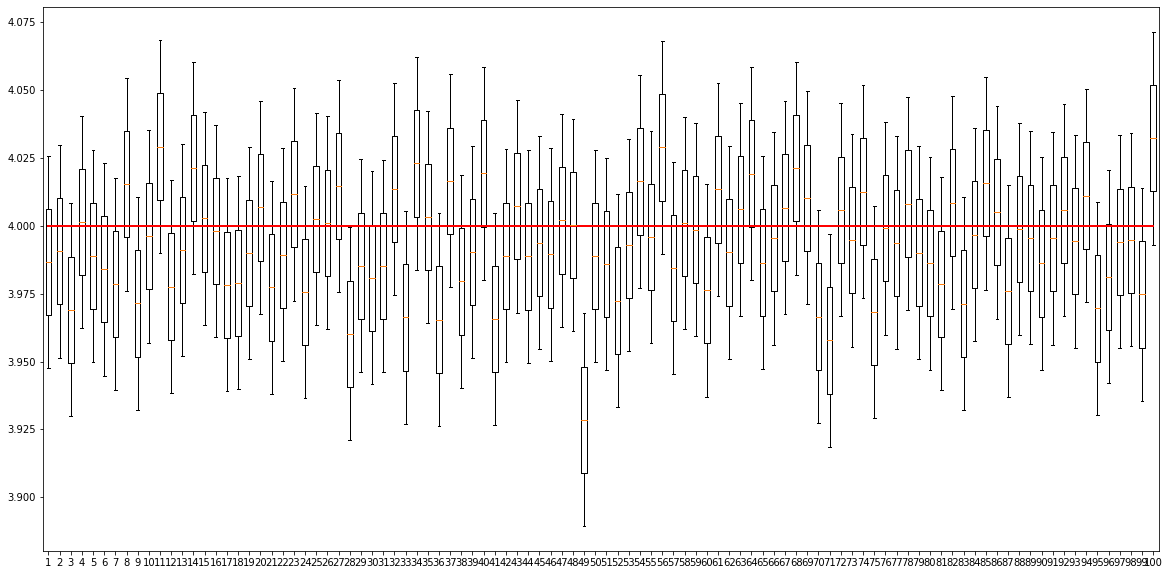

In [9]:
# simulate 100 interval with 20,000 sample size
intervallist = []
# sample size
samplesize = 20000
# start count
c = 0
for i in range(0,100):
    # sample 100 sample
    rs = random.choices(s, k=samplesize)
    # calculate mean
    mean = np.mean(rs)
    upbound = mean + k*sigma/np.sqrt(samplesize)
    lowbound = mean - k*sigma/np.sqrt(samplesize)
    # collect difference between sample mean and mu
    intervallist.append([lowbound,mean,upbound])
    if upbound >= mu and lowbound <= mu:
        c += 1
        
print("number of interval that cover the expected values:", c)
# set figure size.
plt.figure(figsize=(20,10))
# plot box plots of each sample mean.
plt.boxplot(intervallist)
plt.plot([1, 100],[mu,mu], 'k-', lw=2, color='red')
# show plot.
plt.show()